<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Расчет-прибыли" data-toc-modified-id="Расчет-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет прибыли</a></span></li><li><span><a href="#Расчет-рисков-и-прибыли-для-каждого-региона" data-toc-modified-id="Расчет-рисков-и-прибыли-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчет рисков и прибыли для каждого региона</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Комментарий-ревьюера:-общий-вывод-по-проекту." data-toc-modified-id="Комментарий-ревьюера:-общий-вывод-по-проекту.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Комментарий ревьюера: общий вывод по проекту.</a></span></li><li><span><a href="#Комментарий-ревьюера:-общий-вывод-по-проекту-v.2." data-toc-modified-id="Комментарий-ревьюера:-общий-вывод-по-проекту-v.2.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Комментарий ревьюера: общий вывод по проекту v.2.</a></span></li></ul></div>

# Постановка задачи

**Цель:**

Нужно решить, где стоит бурить новую скважину компании "ГлавРосГосНефть".

**План работы:**

- В избранном регионе найти месторождения, для каждого определить значения признаков;
- Построить модель и оценить объём запасов;
- Выбрать месторождения с самыми высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;


**Данные:**

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

# Подготовка данных

In [1]:
#загружаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#обьявляем константы
RS = 12345

BUDGET = 10000000000 #бюджет на разработку 200 скважин
INCOME_PER_BARREL = 450
INCOME_PER_SINGLE_PRODUCT = 450000 #доход с тысячи бареллей 

ITERATIONS = 1000
AMOUNT_RESEARCH = 500
AMOUNT_TOP = 200

In [4]:
#загружаем данные 
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
def general_info(data):
    display(data.head(5))
    print()
    print('Размеры датафрейма:', data.shape)
    print('Количество дубликатов:', data.duplicated().sum())
    print('Количество дубликатов в столбце id:', data['id'].duplicated().sum())
    print('Пропуски в данных:') 
    print(data.isna().sum())

In [6]:
print(general_info(data_0))
print(general_info(data_1))
print(general_info(data_2))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Размеры датафрейма: (100000, 5)
Количество дубликатов: 0
Количество дубликатов в столбце id: 10
Пропуски в данных:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Размеры датафрейма: (100000, 5)
Количество дубликатов: 0
Количество дубликатов в столбце id: 4
Пропуски в данных:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Размеры датафрейма: (100000, 5)
Количество дубликатов: 0
Количество дубликатов в столбце id: 4
Пропуски в данных:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
None


**Наблюдения:** С данными все в порядке, датафреймы разных регионов одинакового размера, полных дубликатов и пропусков нет. Есть только дубликаты в столбце ID, что достаточно критично, поскольку ID скважин должны быть уникальны, следовательно, произошла ошибка. Так как этих дубликатов очень мало, то мы можем их удалить. 

In [7]:
#создадим все-таки обьединенную таблицу. Она может быть полезна
data_0['region'] = 0
data_1['region'] = 1
data_2['region'] = 2
data = pd.concat([data_0, data_1, data_2])

In [8]:
def preprocessing(data):
    data.drop_duplicates(subset = 'id', inplace = True)
    data = data.drop(['id'] , axis=1)
    data = data.drop(['region'] , axis=1)
    return data

In [9]:
data_0=preprocessing(data_0)
data_1=preprocessing(data_1)
data_2=preprocessing(data_2)

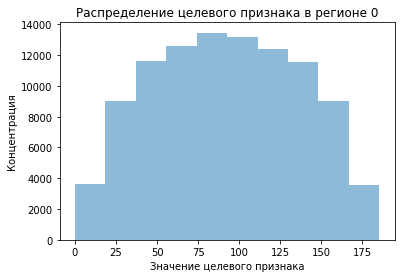

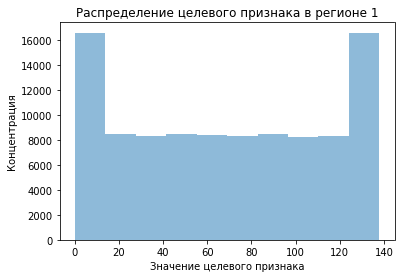

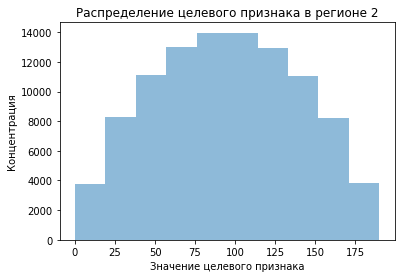

In [10]:
for index in range(0,3):
    data_index = data[data['region'] == index]
    plt.hist(data_index['product'], alpha=0.5)
    plt.title(f'Распределение целевого признака в регионе {index}')
    plt.xlabel('Значение целевого признака')
    plt.ylabel('Концентрация')
    plt.show()

В двух региноах (0 и 2) распределение почти одинаковое и близко к нормальному. Третий регион (1) сильно отличается от остальных.

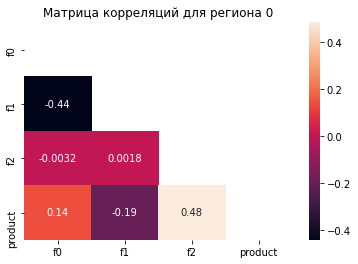

In [11]:
matrix = np.triu(data_0.corr())
sns.heatmap(data_0.corr(), annot=True, mask=matrix)
plt.title('Матрица корреляций для региона 0');

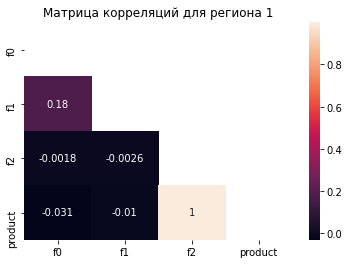

In [12]:
matrix = np.triu(data_1.corr())
sns.heatmap(data_1.corr(), annot=True, mask=matrix)
plt.title('Матрица корреляций для региона 1');

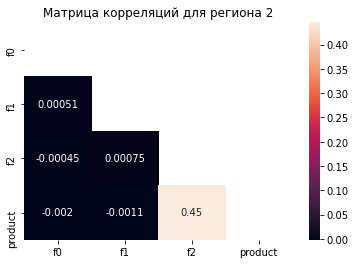

In [13]:
matrix = np.triu(data_2.corr())
sns.heatmap(data_2.corr(), annot=True, mask=matrix)
plt.title('Матрица корреляций для региона 2');

**Выводы:** была проведена предобработка данных, удалены дубликаты, проанализировани распределения целевого признака по регионам, а также данные были изучены данные на предмет мультиколлинеарности

# Обучение и проверка модели

In [14]:
numeric = ['f0','f1', 'f2']
scaler = StandardScaler()
model = LinearRegression()

In [15]:
def make_predictions(data):
    target= data['product']
    features = data.drop(['product'] , axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=RS)
    
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    prediction = pd.Series(predicted_valid, index=target_valid.index)
    mse = mean_squared_error(target_valid, predicted_valid)

    features_valid['predictions'] = prediction
    features_valid['target'] = target_valid
    print("Linear Regression")
    print("MSE =",  mse)
    print("RMSE =", mse ** 0.5)
    print("R2 =", r2_score(target_valid, predicted_valid))
    print('MAE =', mean_absolute_error(target_valid, predicted_valid))
    print('Mean =', predicted_valid.mean())
    return prediction, features_valid

In [16]:
prediction_0, features_valid_0 = make_predictions(data_0)

Linear Regression
MSE = 1432.8895312377324
RMSE = 37.853527328872964
R2 = 0.2723923460817068
MAE = 31.141028675220262
Mean = 92.78915638280621


In [17]:
prediction_1, features_valid_1= make_predictions(data_1)

Linear Regression
MSE = 0.7957697318650319
RMSE = 0.8920592647717033
R2 = 0.9996222988190184
MAE = 0.71935300965161
Mean = 69.1783195703043


In [18]:
prediction_2, features_valid_2 = make_predictions(data_2)

Linear Regression
MSE = 1606.0738119304278
RMSE = 40.07585073246016
R2 = 0.19556241810202346
MAE = 32.83139014902301
Mean = 94.86572480562035


Отклонение от правильного ответа равно примерно половине (даже немного меньше) от среднего значения. Это неплохо

**Мини-вывод:** мы обучили модель, получили предсказания, записали их в таблицу. Модель давала очень точные предсказания в регионе 1, тк в этом регионе корелляция между признаком f2 и целевым была очень высокая. На данных из других регионов модель дает достаточно хорошие предсказания

# Расчет прибыли

In [19]:
#Все ключевые значения для расчётов сохраним в отдельных переменных.

In [20]:
budget_per_well = BUDGET/200
n = budget_per_well/INCOME_PER_SINGLE_PRODUCT
print(n)
#каждая скважина должна давать минимум 111 тыс бареллей для избежания убытка

111.11111111111111


In [21]:
print('Средний обьем полученного сырья в регионе 0:', prediction_0.mean())
print('Средний обьем полученного сырья в регионе 1:', prediction_1.mean())
print('Средний обьем полученного сырья в регионе 2:', prediction_2.mean())

Средний обьем полученного сырья в регионе 0: 92.78915638280621
Средний обьем полученного сырья в регионе 1: 69.1783195703043
Средний обьем полученного сырья в регионе 2: 94.86572480562035


Можно заметить, что обьем сырья в каждом из регионов меньше нужного минимума

Среднее значения для каждого региона оказалось меньше нужной нам для избежания убытков величины. Это значение получается, если мы не будем выбирать среди скважин лучше, а возьмем любые из имеющихся. Попробуем улчшить результат, взяв только те скважины, которые могут предоставить лучший запас сырья при помощи техники bootstrap.

# Расчет рисков и прибыли для каждого региона

In [22]:
def revenue(target, predictions, count):
    probs_sorted = predictions.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return INCOME_PER_SINGLE_PRODUCT * selected.sum() - BUDGET

In [23]:
def bootstrap(target, predictions): 
        
    state = np.random.RandomState(RS)
    values = []
    
    for i in range(ITERATIONS):
        target_subsample = target.sample(n=AMOUNT_RESEARCH, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
 
        values.append(revenue(target_subsample, probs_subsample, AMOUNT_TOP))

    values = pd.Series(values)
    mean = values.mean()
    risk = values[values<0].count()/ITERATIONS
    confidence_interval = st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=values.sem())

    print("Средняя прибыль региона", ':', round(mean))
    print("95%-й доверительный интервал", ':', confidence_interval)
    print("Риск убытков региона",  ':', risk*100, '%')

In [24]:
print('Регион №0')
bootstrap(features_valid_0['target'], features_valid_0['predictions'])

Регион №0
Средняя прибыль региона : 409428039
95%-й доверительный интервал : (392436312.2689626, 426419764.9739095)
Риск убытков региона : 7.1 %


In [25]:
print('Регион №1')
bootstrap(features_valid_1['target'], features_valid_1['predictions'])

Регион №1
Средняя прибыль региона : 536902587
95%-й доверительный интервал : (523348898.58695024, 550456276.3879564)
Риск убытков региона : 0.8999999999999999 %


In [26]:
print('Регион №2')
bootstrap(features_valid_2['target'], features_valid_2['predictions'])

Регион №2
Средняя прибыль региона : 353790363
95%-й доверительный интервал : (336935105.9082979, 370645619.553586)
Риск убытков региона : 10.2 %


# Вывод

Регион, который стоит выбрать для бурения скважин -- это регион №1. Это регион с самой высокой возможной средней выручкой,95-ый квантиль в этом регионе имеет самое большое значение среди остальных, а также самый низкий риск убытков именно у номера 1. 